# Descriptive Statistics, Data Exploration Techniques, and Open Science Principles

## Descriptive Statistics and Data Exploration Techniques

## 1. Descriptive Statistics
### 1.1 Measures of Central Tendency

#### Mean
The mean is the sum of all values in a dataset divided by the number of values. It represents the average value of the dataset.

In [9]:
import numpy as np

data = np.random.rand(100)
mean = np.mean(data)
print("Mean:", mean)

Mean: 0.5163996277828431


#### Median
The median is the middle value in a dataset when the values are sorted in ascending or descending order. If there's an even number of values, the median is the average of the two middle values.

In [10]:
median = np.median(data)
print("Median:", median)

Median: 0.5725429490091456


#### Mode
The mode is the value that appears most frequently in a dataset. A dataset can have more than one mode if multiple values have the same highest frequency.

In [11]:
import scipy.stats as stats

mode = stats.mode(data)
print("Mode:", mode.mode[0])

Mode: 0.0024621515268254957


/tmp/ipykernel_130/3457552241.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(data)


### 1.2 Variability Measures

Variability measures are used to describe the spread or dispersion of a dataset. The main measures of variability are:

- Range
- Variance
- Standard Deviation

#### Range
The range is the difference between the maximum and minimum values in a dataset.

In [13]:
data_range = np.ptp(data)
print("Range:", data_range)

Range: 0.9860285437486973


#### Variance
The variance is the average of the squared differences from the mean. It measures how far each value in the dataset is from the mean.

In [14]:
variance = np.var(data)
print("Variance:", variance)

Variance: 0.07789118725477101


#### Standard Deviation
The standard deviation is the square root of the variance. It measures the average distance between each value and the mean.

In [15]:
std_dev = np.std(data)
print("Standard Deviation:", std_dev)

Standard Deviation: 0.27908992682426037


#### Interquartile Range

The interquartile range (IQR) is a measure of statistical dispersion representing the difference between the first quartile (25th percentile) and the third quartile (75th percentile) of a dataset, indicating the spread of the middle 50% of the data.

In [ ]:
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25
print("Interquartile Range:", iqr)

## 2. Data Exploration Techniques

Data exploration techniques help us gain insights into the dataset by visualizing the data and identifying patterns or trends.

### 2.1 Load a dataset

In [24]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
df = pd.read_csv(url)

### 2.2 Explore the dataset

In [32]:
# First few rows
print(df.head())
df.dropna(inplace=True)
print(df.head())

# Summary statistics
print(df.describe())

     location  iso_code        date  total_vaccinations  people_vaccinated  \
1084   Africa  OWID_AFR  2021-10-28         189809912.0        118429867.0   
1085   Africa  OWID_AFR  2021-10-29         193296330.0        120094541.0   
1086   Africa  OWID_AFR  2021-10-30         194361624.0        120630098.0   
1087   Africa  OWID_AFR  2021-10-31         196480876.0        122001362.0   
1088   Africa  OWID_AFR  2021-11-01         197837482.0        122691032.0   

      people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
1084               76360930.0         28870.0               1607279.0   
1085               79415052.0         32750.0               1793119.0   
1086               80078265.0         71510.0               1674945.0   
1087               80759982.0         71510.0               1464629.0   
1088               81432762.0        124228.0               1439763.0   

      daily_vaccinations  total_vaccinations_per_hundred  \
1084           1713227.0        

### 2.3 Histograms
A histogram is a graphical representation of the distribution of a dataset. It groups the data into bins and plots the frequency of each bin.

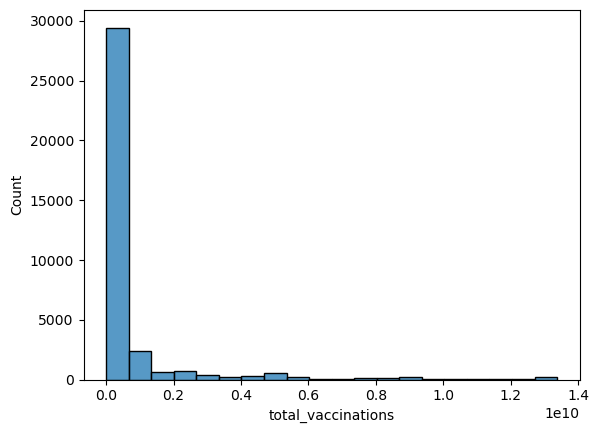

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x="total_vaccinations", bins=20)
plt.show()

### 2.4 Box Plots
A box plot is a graphical representation of the distribution of a dataset. It displays the median, quartiles, and outliers of the dataset.

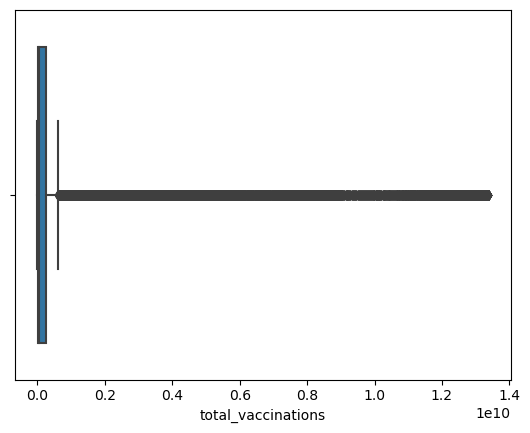

In [34]:
sns.boxplot(data=df, x="total_vaccinations")
plt.show()

### 2.5 Correlation Matrix
A correlation matrix is a table showing the correlation coefficients between multiple variables. Each cell in the table shows the correlation between two variables.

/tmp/ipykernel_130/3094592546.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


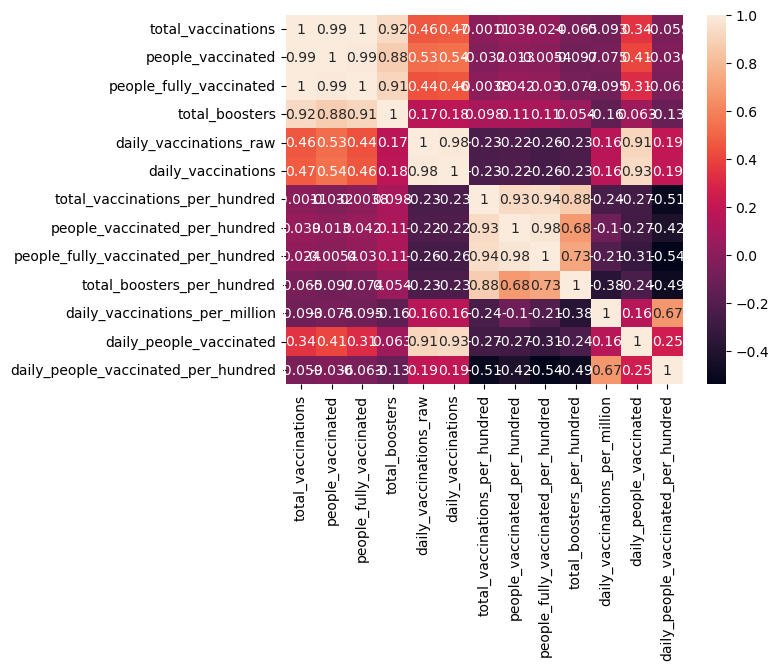

In [35]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### 2.6 Grouping Data

In [36]:
grouped_data = df.groupby('location').sum()
print(grouped_data.head())

           total_vaccinations  people_vaccinated  people_fully_vaccinated  \
location                                                                    
Africa           2.993342e+11       1.907401e+11             1.490449e+11   
Albania          4.545286e+07       2.262754e+07             2.051088e+07   
Argentina        6.189072e+10       2.651216e+10             2.025815e+10   
Asia             4.816053e+12       2.148192e+12             1.855162e+12   
Australia        7.983302e+09       3.658742e+09             3.373366e+09   

           total_boosters  daily_vaccinations_raw  daily_vaccinations  \
location                                                                
Africa       2.038673e+10            6.099833e+08        6.128318e+08   
Albania      2.314437e+06            1.478140e+05        1.333650e+05   
Argentina    1.348451e+10            1.154401e+08        1.154552e+08   
Asia         6.773711e+11            8.909462e+09        8.914303e+09   
Australia    9.511938e

/tmp/ipykernel_130/3854746691.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('location').sum()


### 2.7 Filtering Data

In [37]:
filtered_data = df[df['total_vaccinations'] > 1000000]
print(filtered_data.head())

     location  iso_code        date  total_vaccinations  people_vaccinated  \
1084   Africa  OWID_AFR  2021-10-28         189809912.0        118429867.0   
1085   Africa  OWID_AFR  2021-10-29         193296330.0        120094541.0   
1086   Africa  OWID_AFR  2021-10-30         194361624.0        120630098.0   
1087   Africa  OWID_AFR  2021-10-31         196480876.0        122001362.0   
1088   Africa  OWID_AFR  2021-11-01         197837482.0        122691032.0   

      people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
1084               76360930.0         28870.0               1607279.0   
1085               79415052.0         32750.0               1793119.0   
1086               80078265.0         71510.0               1674945.0   
1087               80759982.0         71510.0               1464629.0   
1088               81432762.0        124228.0               1439763.0   

      daily_vaccinations  total_vaccinations_per_hundred  \
1084           1713227.0        

### 2.8 Sorting Data

In [38]:
sorted_data = df.sort_values('total_vaccinations', ascending=False)
print(sorted_data.head())

       location  iso_code        date  total_vaccinations  people_vaccinated  \
164374    World  OWID_WRL  2023-04-23        1.337445e+10       5.579515e+09   
164373    World  OWID_WRL  2023-04-22        1.337404e+10       5.578053e+09   
164372    World  OWID_WRL  2023-04-21        1.337395e+10       5.578045e+09   
164371    World  OWID_WRL  2023-04-20        1.337374e+10       5.578030e+09   
164370    World  OWID_WRL  2023-04-19        1.337347e+10       5.578000e+09   

        people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
164374             5.130946e+09    2.761718e+09                117755.0   
164373             5.129504e+09    2.761533e+09                153414.0   
164372             5.129498e+09    2.761481e+09                201880.0   
164371             5.129486e+09    2.761423e+09                178474.0   
164370             5.129430e+09    2.761305e+09                172449.0   

        daily_vaccinations  total_vaccinations_per_hundred  \
164374

## 3. Open Science Principles

- Open Data: Share your raw and processed data using platforms such as Zenodo, Figshare, or the Open Science Framework.
- Open Access: Publish your research in open-access journals, ensuring free and unrestricted access to your work.
- Open Source: Share your code and software on platforms such as GitHub, GitLab, or Bitbucket, allowing others to reproduce your work and build upon it.
- Open Peer Review: Participate in transparent and open peer-review processes to improve the quality and rigor of research.
- Open Educational Resources: Create and share educational materials under open licenses, enabling free use, adaptation,and distribution.
- Open Collaboration: Collaborate with researchers from different disciplines and institutions, promoting the sharing of ideas, resources, and expertise.
- Open Licensing: Use open licenses (such as Creative Commons) for your research outputs, ensuring they are freely available and can be reused with proper attribution.

## 4. Exercise: COVID-19 Vaccination Data Analysis

- Explore the dataset to understand its structure, columns, and data types.
- Clean the dataset by handling missing values, if necessary.
- Calculate descriptive statistics for the dataset.
- Visualize the distribution of total vaccinations for each country.
- Compare the total vaccinations per hundred across the top 10 countries with the highest number of vaccinations.
- Analyze the daily vaccinations per million for the top 5 countries with the highest number of total vaccinations.

```python
top_5_countries = df.groupby('location')['total_vaccinations'].max().sort_values(ascending=False).head(5).index
```